# 2017 Kaggle Machine Learning & Data Science Survey

https://www.kaggle.com/code/rounakbanik/data-science-faq/notebook

All: Every respondent was shown this question

Non-worker: Respondents who indicated that they were "Not employed, and not looking for work" or "I prefer not to say"

Non-switcher: Respondents that indicated that they were not actively looking to switch careers to data science.

Worker: Respondents who indicted that they were "Employed full-time", "Employed part-time", "Independent contractor, freelancer, or self-employed", or "retired"

CodingWorker: Respondents who indicated that they were "Employed full-time", "Employed part-time", or an "Independent contractor, freelancer, or self-employed" AND that they write code to analyze data in their current job

CodingWorker-NC: Respondents who indicated that they were "Employed full-time" or "Employed part-time" AND that they write code to analyze data in their current job. 

Learners: Respondents who indicated that they were either students, formally or informally learning data science skills, planning to transition into data science, or not employed but looking for work

## 데이터 파일

5개의 데이터 파일을 제공

* schema.csv : 설문 스키마가 있는 CSV파일. multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함됨
* multipleChoiceResponse.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017년 9월 14일에 액세스한 통화 변환율(USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마.

## Loading Data and Libraries

In [67]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('2017_Kaggle_ML_DS_Survey/schema.csv')
question.shape

# 290개의 문항, 3개의 Column

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
# 선다형 객관식 문제에 대한 응답 데이터
mcq = pd.read_csv('2017_Kaggle_ML_DS_Survey/multipleChoiceResponses.csv',
                  encoding='iso-8859-1', low_memory=False)
mcq.shape

# 16,716명이 응답. 선다형 객관식 문제는 228개

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

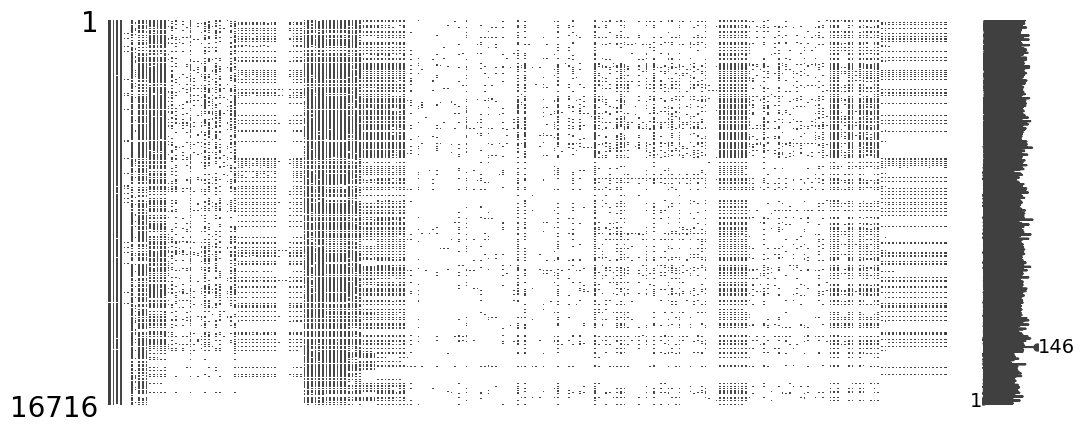

In [7]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 Column이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.

import missingno as msno

msno.matrix(mcq, figsize=(12, 5))

## 설문 통계

### 성별

<AxesSubplot: xlabel='count', ylabel='GenderSelect'>

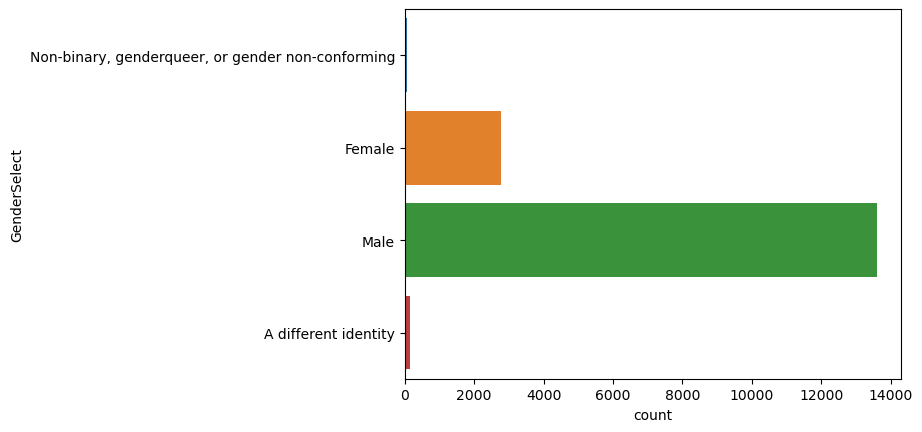

In [8]:
sns.countplot(y='GenderSelect', data=mcq)

# 여성보다는 남성의 비율이 훨씬 높음

### 국가별 응답수

In [9]:
con_df = pd.DataFrame(mcq['Country'].value_counts())

con_df['국가'] = con_df.index
con_df.columns = ['응답 수', '국가']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

# US > India > Other > Russia > UK ... 순으로 응답수가 많음

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


### 연령 정보

In [10]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

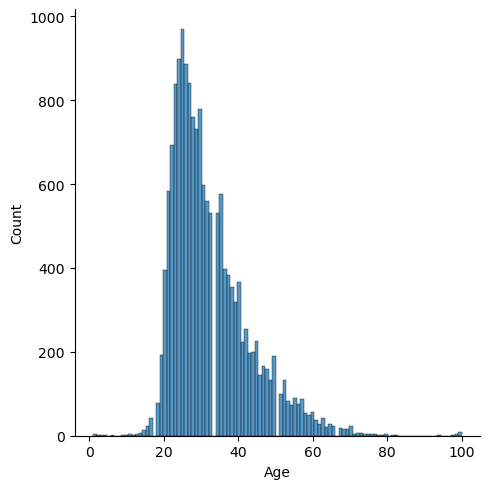

In [11]:
sns.displot(mcq[mcq['Age'] > 0]['Age'])

# 응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세.

### 학력

<AxesSubplot: xlabel='count', ylabel='FormalEducation'>

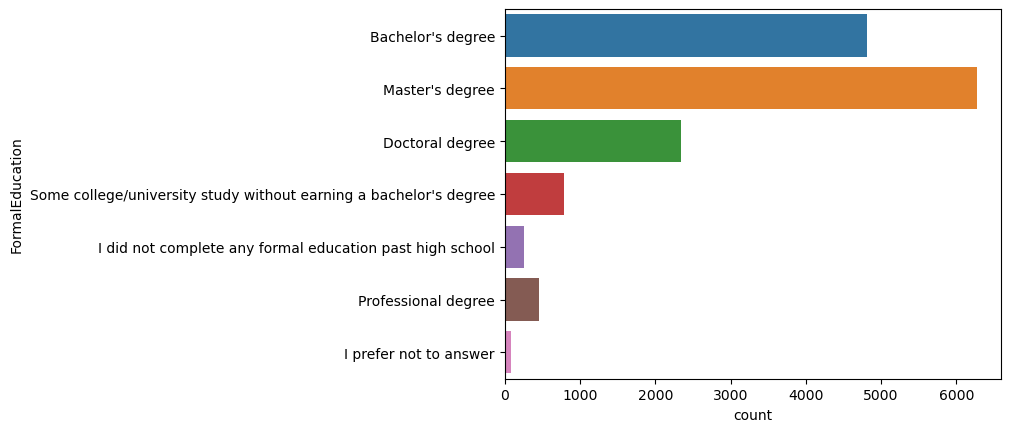

In [12]:
sns.countplot(y='FormalEducation', data=mcq)

# 석사학위 > 학사 > 박사 .. 순

### 전공

In [13]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

# 컴퓨처 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순..

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot: xlabel='count', ylabel='MajorSelect'>

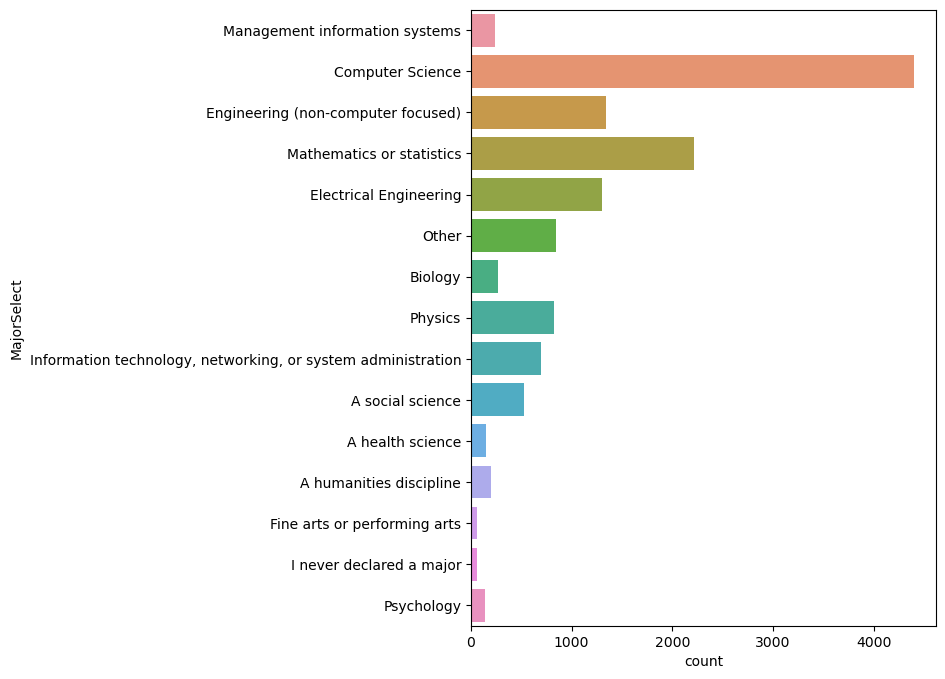

In [14]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

### 취업 여부

In [15]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot: xlabel='count', ylabel='EmploymentStatus'>

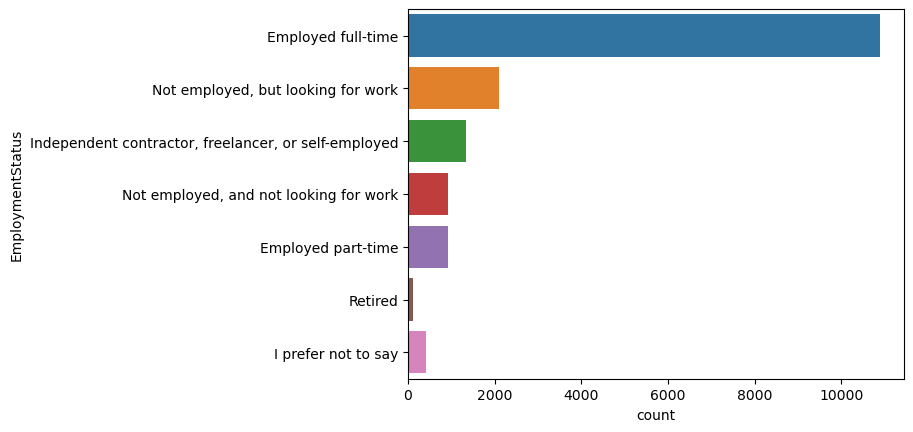

In [16]:
sns.countplot(y='EmploymentStatus', data=mcq)

### 프로그래밍 경험

`Tenure`항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문.

<AxesSubplot: xlabel='count', ylabel='Tenure'>

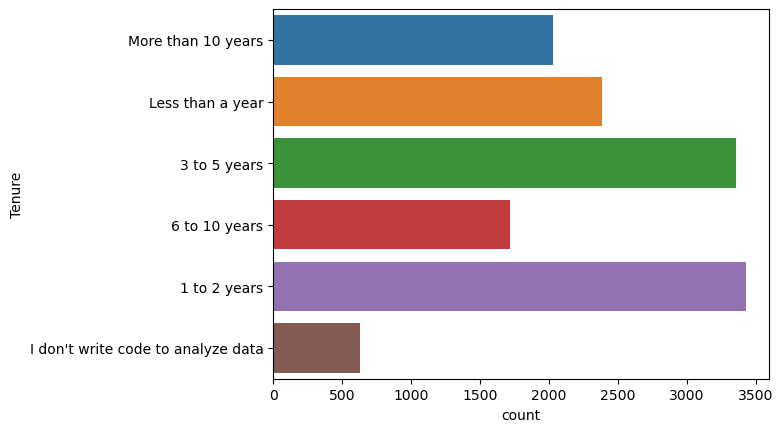

In [17]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea : 194


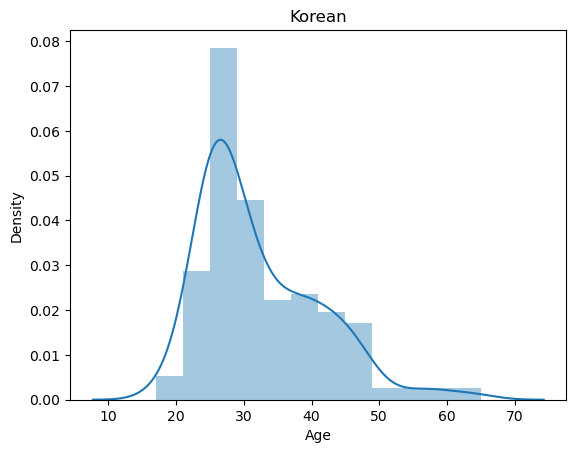

In [18]:
korea = mcq.loc[mcq['Country'] == 'South Korea']

print('The number of interviewees in Korea : ' +str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [19]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korea')

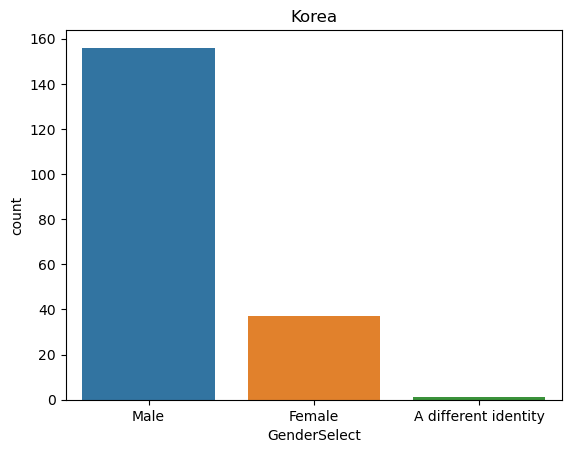

In [20]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korea')

Text(0.5, 1.0, 'korean Male')

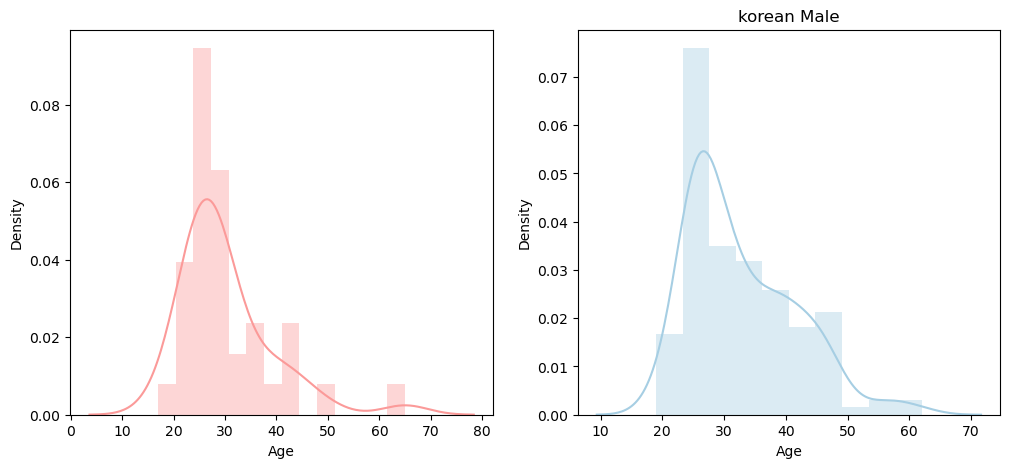

In [21]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

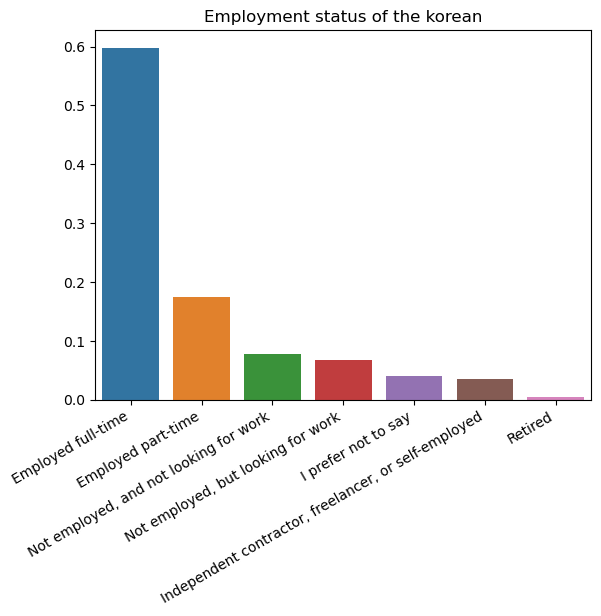

In [22]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))

plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()


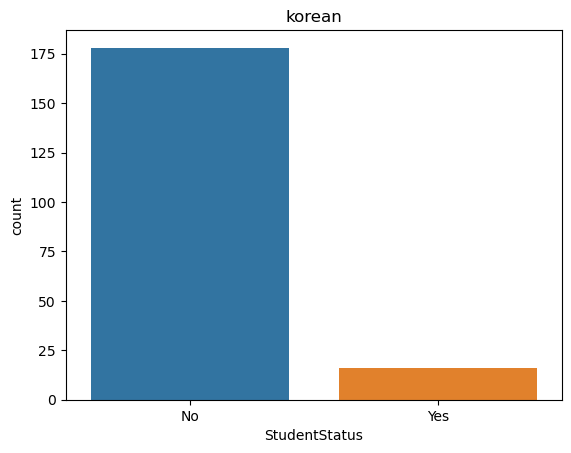

In [23]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [24]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work'
)]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## FAQ

### Python과 R 중 어떤 언어를 배워야 할까요?

<AxesSubplot: xlabel='count', ylabel='LanguageRecommendationSelect'>

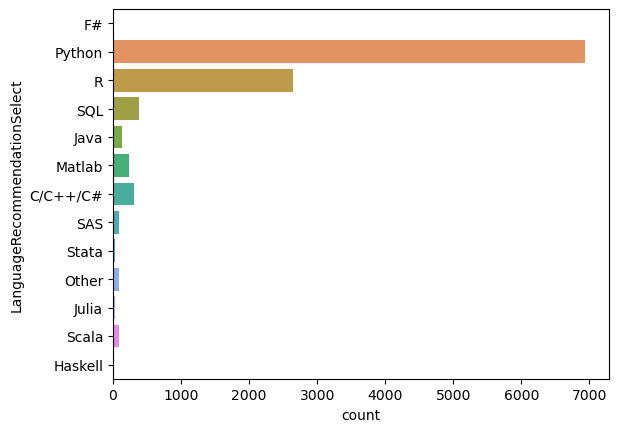

In [25]:
# Python과 R 중 어떤 언어를 배워야 할까요?

sns.countplot(y='LanguageRecommendationSelect', data=mcq)

<AxesSubplot: xlabel='count', ylabel='CurrentJobTitleSelect'>

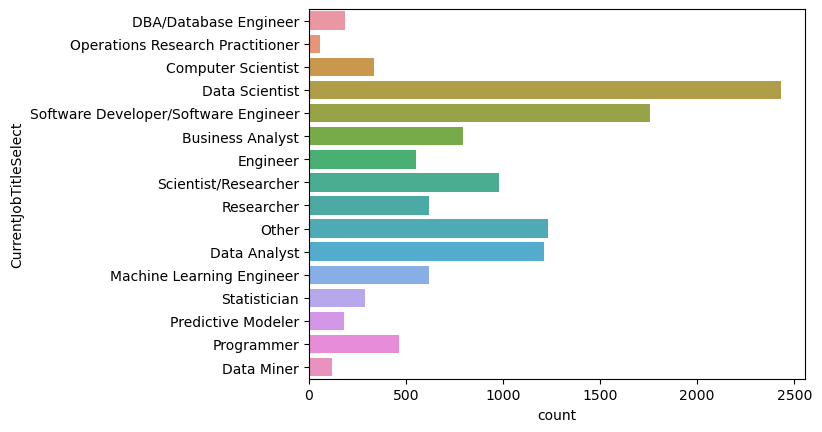

In [26]:
# 현재 하고 있는 일

sns.countplot(y=mcq["CurrentJobTitleSelect"])

### 

In [27]:
# 현재 하고 있는 일에 대한 전체 응답수

mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

In [28]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 파악

data = mcq[
    (mcq['CurrentJobTitleSelect'].notnull()) & 
    ( (mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R') )
]

print(data.shape)

(7158, 228)


<AxesSubplot: xlabel='count', ylabel='CurrentJobTitleSelect'>

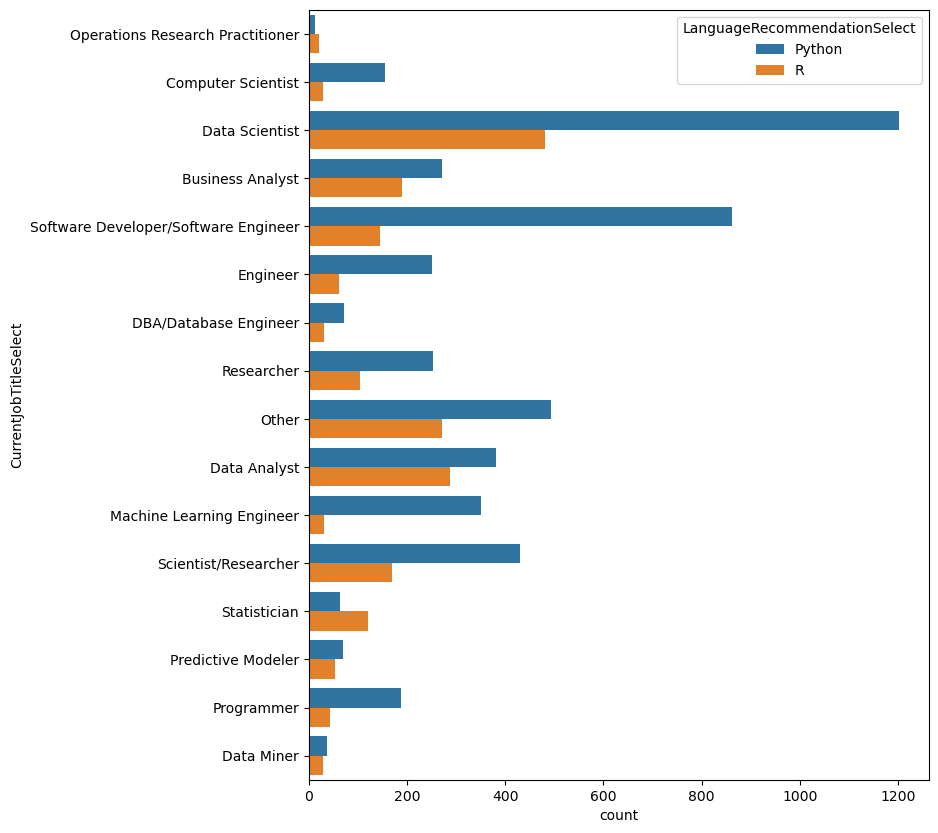

In [29]:
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
              hue='LanguageRecommendationSelect',
              data=data)

### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

In [30]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts()
)
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True)
)

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent,
    left_index=True,
    right_index=True
).head(10)

mcq_ml_tool_df.columns = ['응답수', '비율']
mcq_ml_tool_df


,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot: xlabel='MLToolNextYearSelect'>

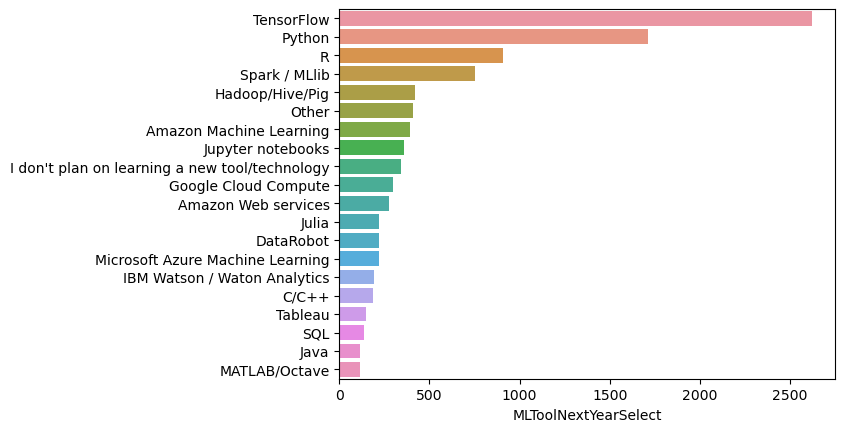

In [31]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)

sns.barplot(y=data.index, x=data)

<AxesSubplot: xlabel='MLMethodNextYearSelect'>

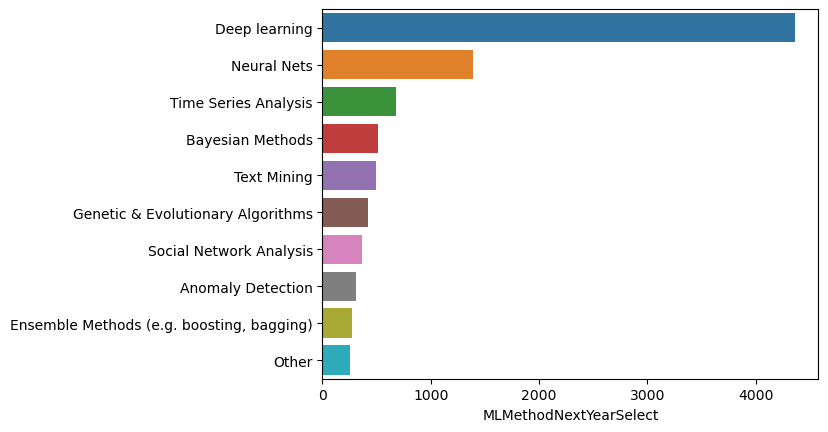

In [32]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(10)
sns.barplot(y=data.index, x=data)

### Q3. 어디에서 데이터 사이언스를 배워야 할까요?

In [33]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))

s = mcq.apply(
    lambda x : pd.Series(x['LearningPlatformSelect']), axis=1
).stack().reset_index(level=1, drop=True)
s.name = 'platform'

<AxesSubplot: xlabel='platform'>

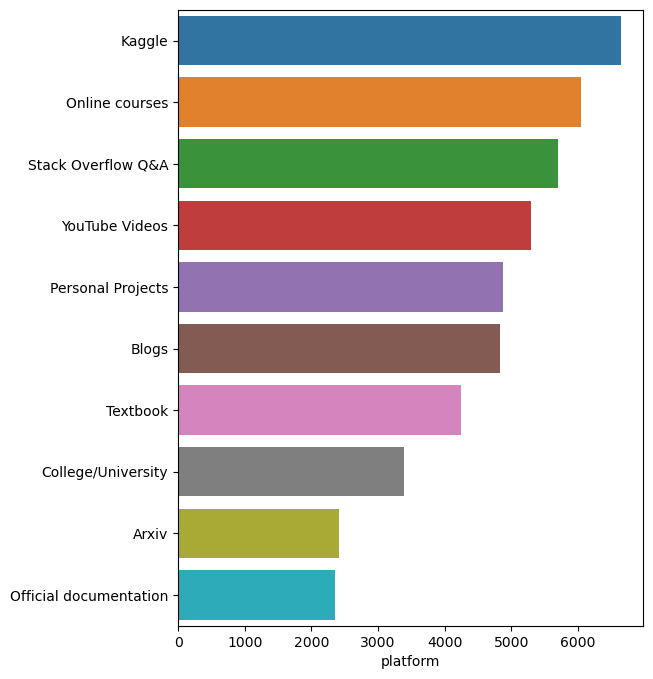

In [34]:
plt.figure(figsize=(6, 8))
data = s[s != 'nan'].value_counts().head(10)
sns.barplot(y=data.index, x=data)

In [35]:
# 설문내용과 누구에게 물어봤는지를 찾아봄

qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [36]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

<AxesSubplot: >

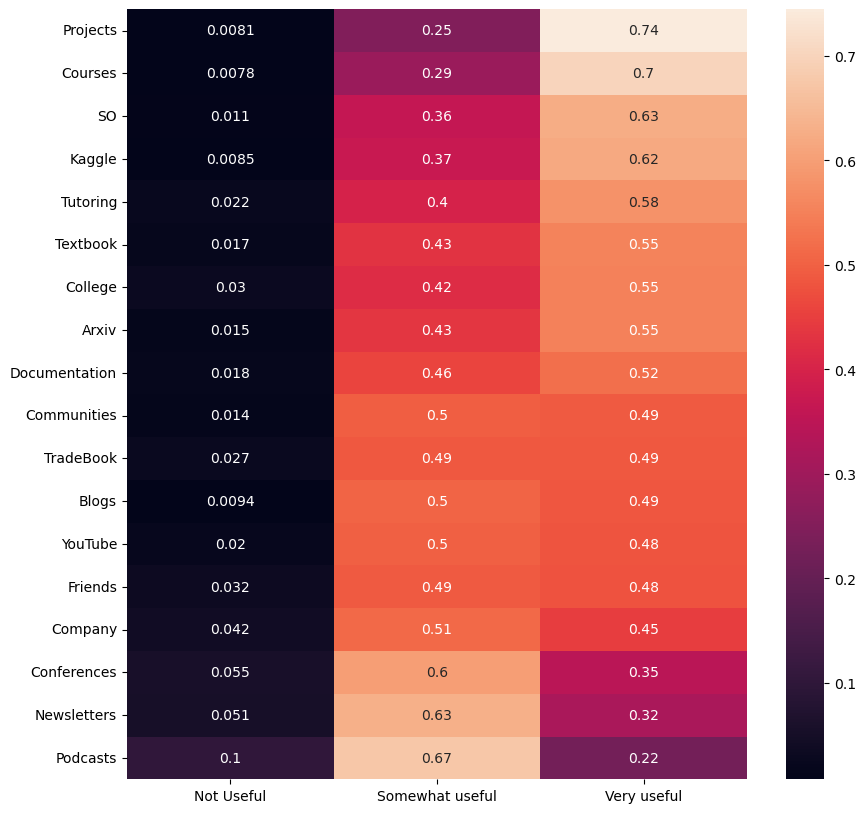

In [37]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다
fdf = {}

for feature in use_features :
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', 
    ascending=False
)

# 학습 플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다
plt.figure(figsize=(10, 10))
sns.heatmap(
    fdf.sort_values(
        'Very useful',
        ascending=False
    ), annot=True
)

<AxesSubplot: title={'center': 'Usefulness of Learning Platforms'}>

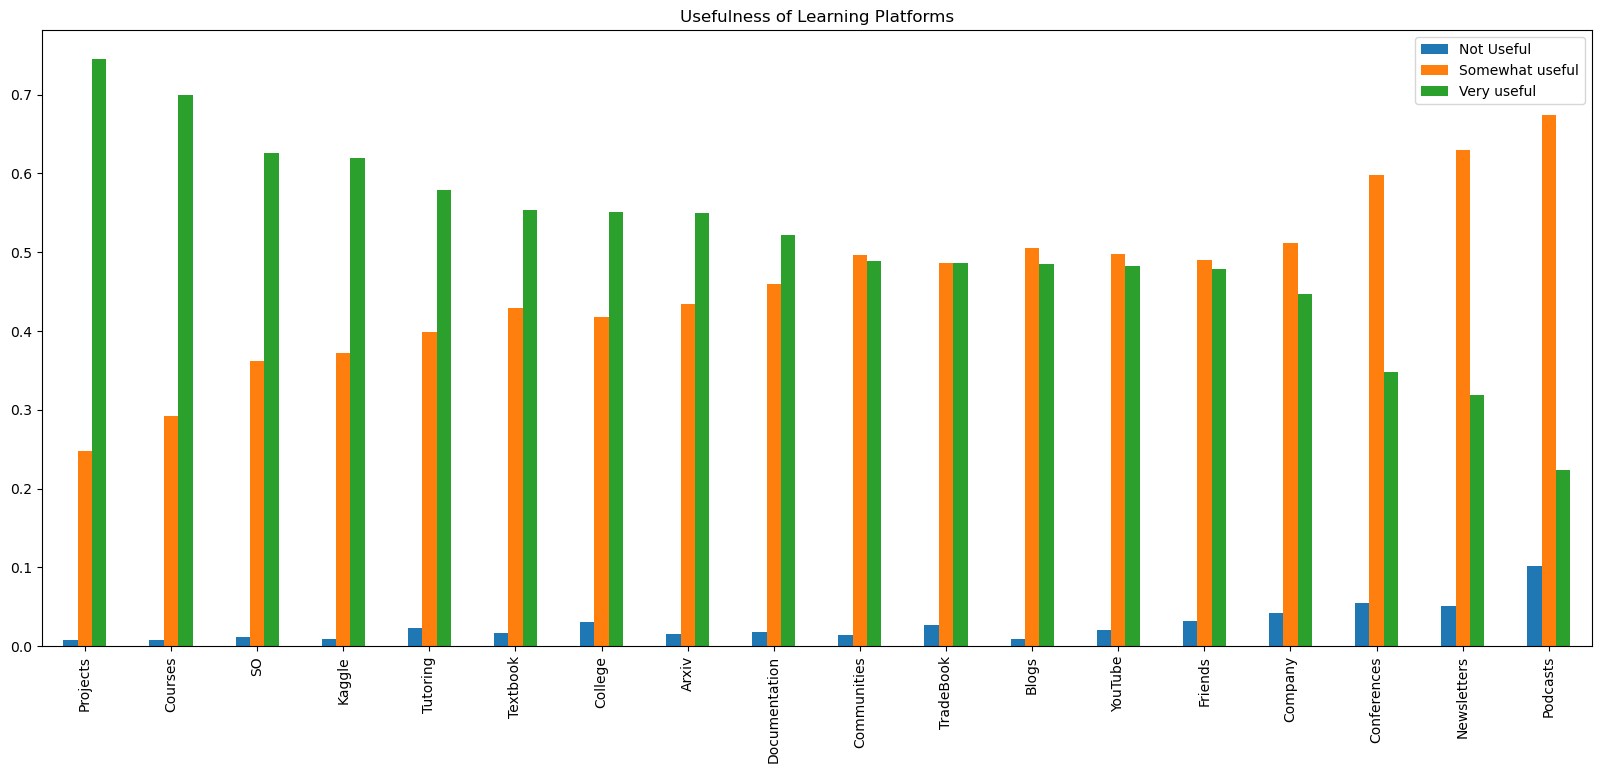

In [38]:
# 유용함의 정도를 각 플랫폼별로 그룹화해서 본다

fdf.plot(kind='bar', figsize=(20, 8), title='Usefulness of Learning Platforms')

In [39]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1] 
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [40]:
cdf = {}
for  feature in cat_features :
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

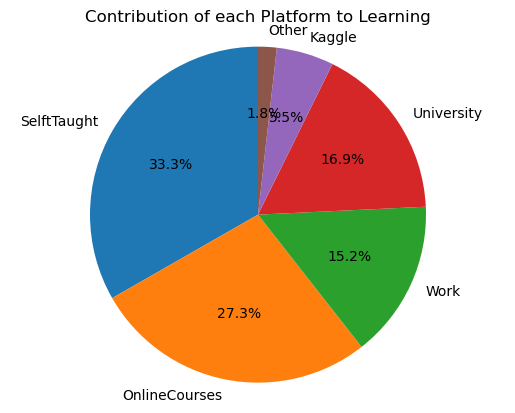

In [41]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

### Q4. 데이터 사이언스를 위해 높은 사양의 컴퓨터가 필요한가요?

In [42]:
# 설문내용과 누구에게 물어봤는지
qc = question.loc[
    question['Column'].str.contains('HardwarePersonalProjectsSelect')
]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [43]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [44]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

s = mcq.apply(lambda x:
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'


In [45]:
s = s[s != 'nan']

In [46]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


### Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

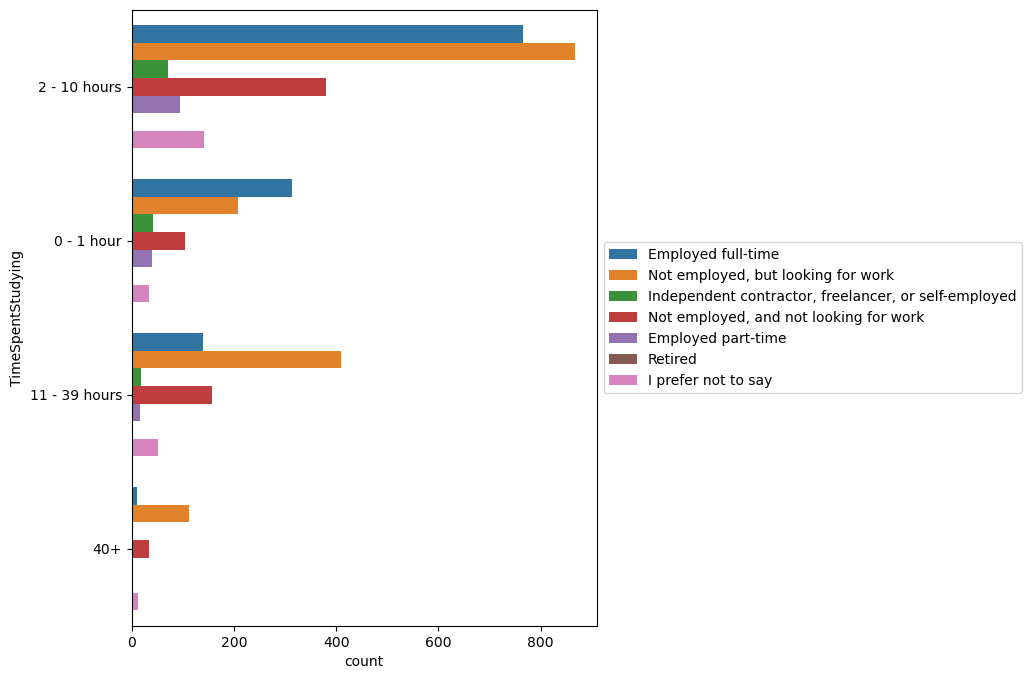

In [47]:
plt.figure(figsize=(6, 8))
sns.countplot(
    y='TimeSpentStudying',
    data=mcq,
    hue='EmploymentStatus'
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

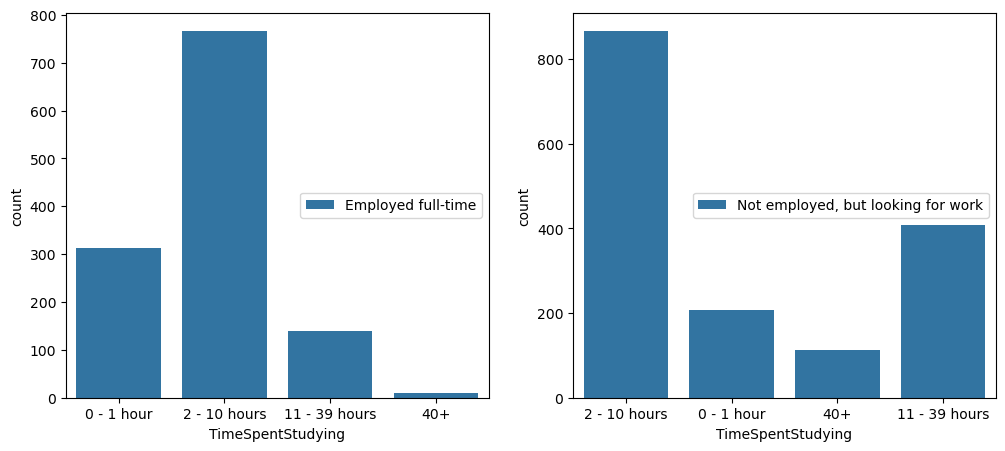

In [48]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.countplot(x='TimeSpentStudying',
              data=full_time,
              hue='EmploymentStatus',
              ax=ax1).legend(loc='center right', bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying',
              data=looking_for_job,
              hue='EmploymentStatus',
              ax=ax2).legend(loc='center right', bbox_to_anchor=(1, 0.5))



### Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할 만한 것이 있는지?

In [49]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x : x.split(','))

mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [51]:
s = mcq.apply(lambda x : pd.Series(x['BlogsPodcastsNewslettersSelect']), 
              axis=1).stack().reset_index(level=1, drop=True)

s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [53]:
s = s[s != 'nan'].value_counts().head(20)

<AxesSubplot: title={'center': 'Most Popular Blogs and Podcasts'}, xlabel='platforms'>

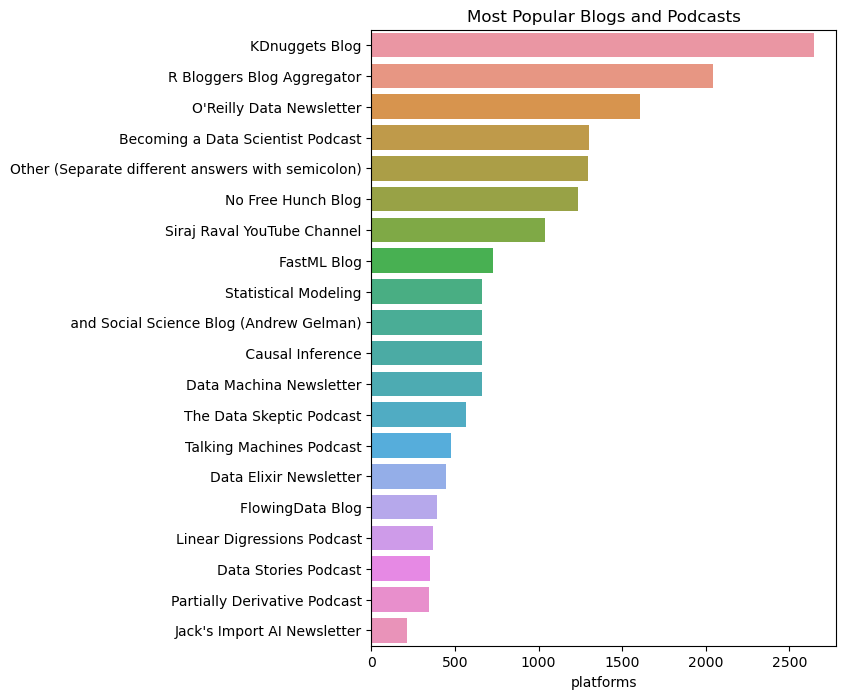

In [54]:
plt.figure(figsize=(6, 8))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)

In [55]:
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x : x.split(','))

mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [58]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']),
              axis=1).stack().reset_index(level=1, drop=True)

t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

<AxesSubplot: title={'center': 'Most Pouplar Course Platforms'}, xlabel='courses'>

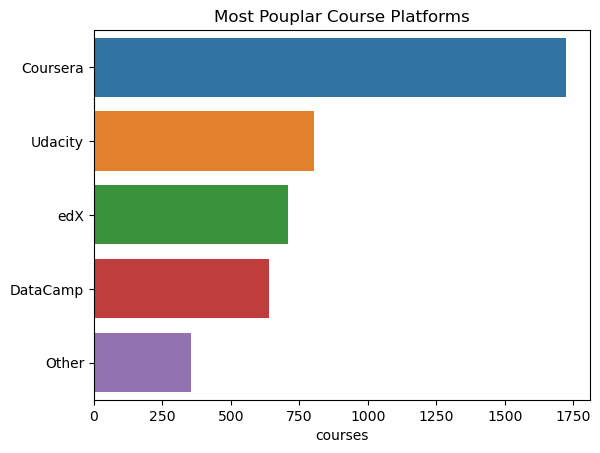

In [59]:
t = t[t != 'nan'].value_counts()

plt.title('Most Pouplar Course Platforms')
sns.barplot(y=t.index, x=t)

### Q.7 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬?

In [61]:
job_features = [
    x for x in mcq.columns if x.find('JobSkillImportance') != -1
    and x.find('JobSkillImportanceOther') == -1
]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [87]:
jdf = {}
for feature in job_features :
    a = mcq[feature].value_counts()
    a = a / a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [88]:
jdf = pd.DataFrame(jdf).transpose().sort_values(by=['Necessary', 'Nice to have'], ascending=False)
jdf

,Necessary,Nice to have,Unnecessary
Python,0.645994,0.327214,0.026792
Stats,0.513889,0.457576,0.028535
Visualizations,0.455392,0.490820,0.053788
SQL,0.434224,0.491778,0.073998
R,0.414807,0.513945,0.071247
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
EnterpriseTools,0.144829,0.564970,0.290200
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752


<AxesSubplot: >

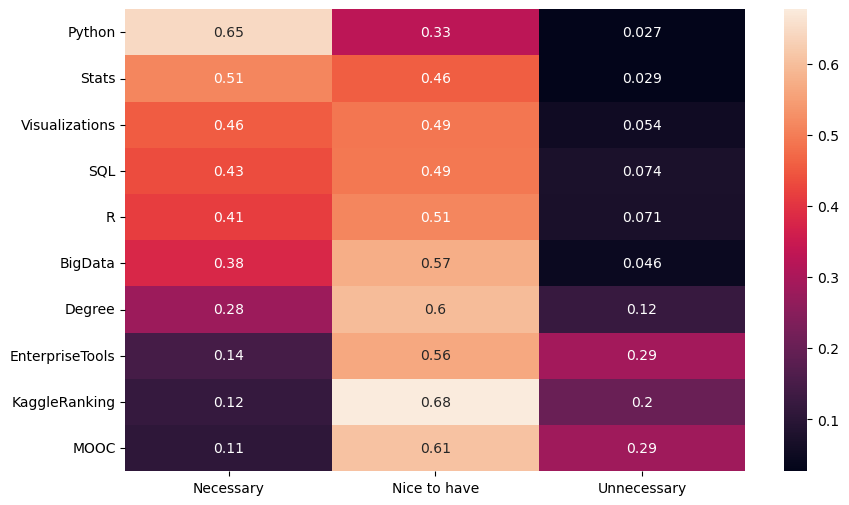

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", 
                            ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Python'),
  Text(1, 0, 'Stats'),
  Text(2, 0, 'Visualizations'),
  Text(3, 0, 'SQL'),
  Text(4, 0, 'R'),
  Text(5, 0, 'BigData'),
  Text(6, 0, 'Degree'),
  Text(7, 0, 'EnterpriseTools'),
  Text(8, 0, 'KaggleRanking'),
  Text(9, 0, 'MOOC')])

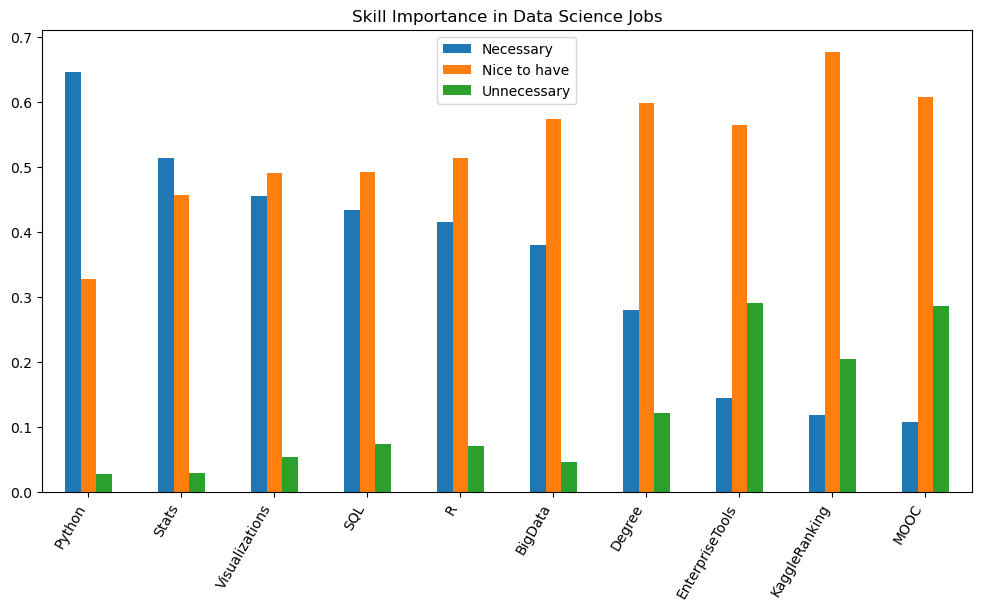

In [90]:
jdf.plot(kind='bar', figsize=(12,6), 
         title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

### Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [91]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [93]:
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('2017_Kaggle_ML_DS_Survey/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[
    ['CompensationAmount','CompensationCurrency',
     'GenderSelect',
     'Country',
     'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [94]:
print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

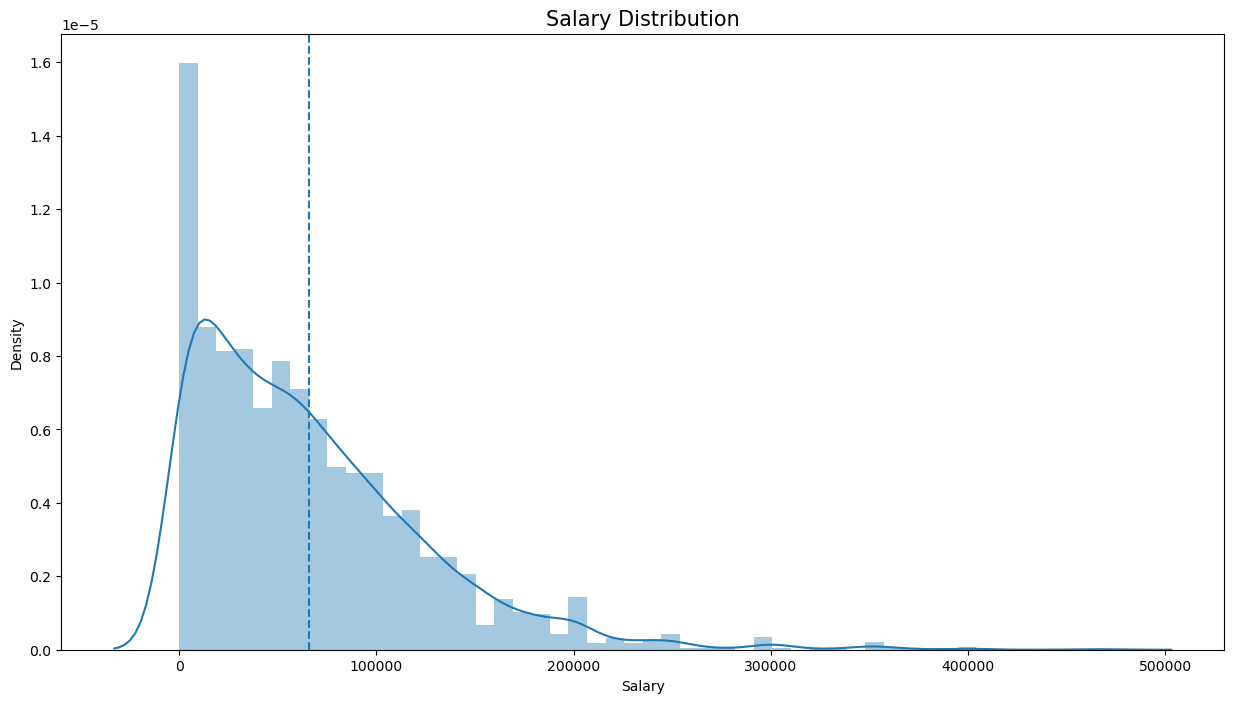

In [99]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000] # 500,000 불 미만인 data
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].mean(), linestyle='dashed') # 평균값 표시
plt.title('Salary Distribution',size=15)

TypeError: barplot() got multiple values for argument 'data'

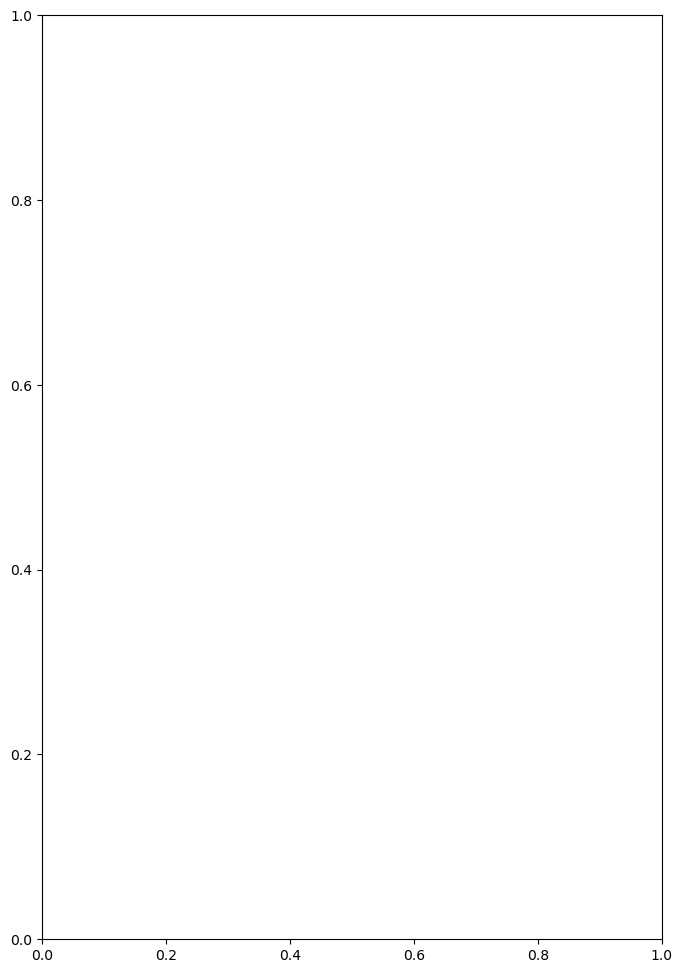

In [105]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', 
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

<AxesSubplot: xlabel='Salary', ylabel='GenderSelect'>

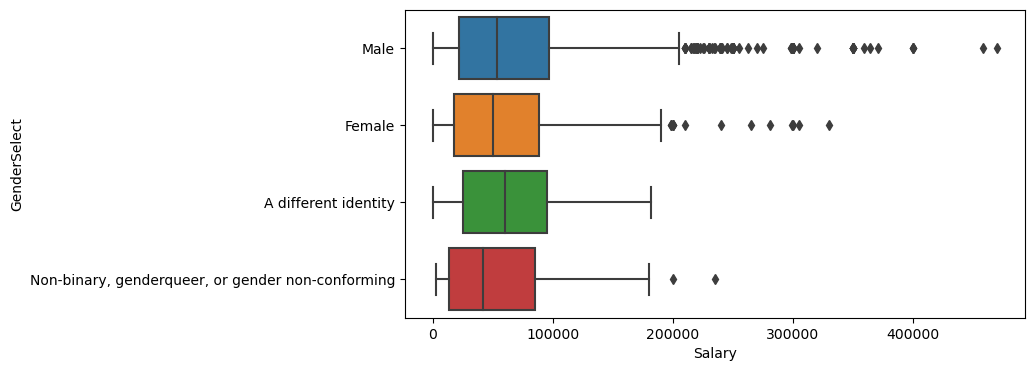

In [106]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

<AxesSubplot: xlabel='Salary', ylabel='GenderSelect'>

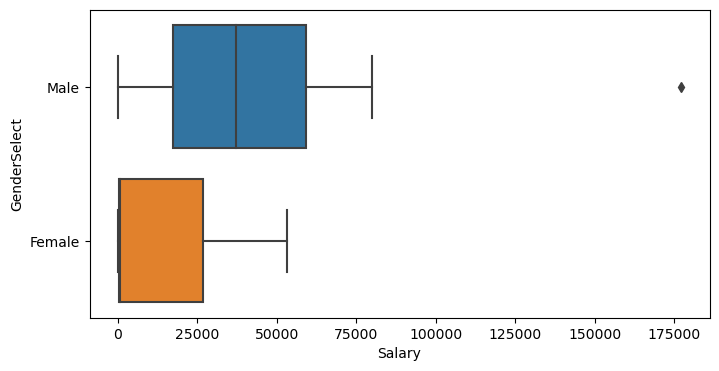

In [107]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary_korea)

In [108]:
salary_korea_male = salary_korea[
    salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [109]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


### Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [110]:
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
    )

In [111]:
q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [112]:
q = q[q != 'nan'].value_counts()

In [113]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


<AxesSubplot: title={'center': 'Most Popular Dataset Platforms'}, xlabel='courses'>

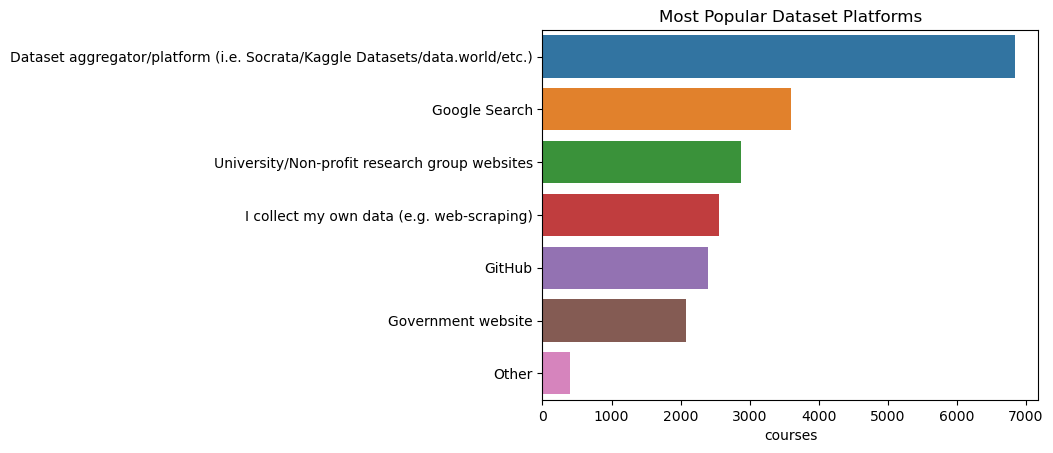

In [114]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

In [115]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('2017_Kaggle_ML_DS_Survey/freeformResponses.csv', 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [116]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [117]:
ppcff = ff[
    'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
-,9
Size,9


### Q10. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [118]:
time_features = [
    x for x in mcq.columns if x.find('Time') != -1
][4 : 10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



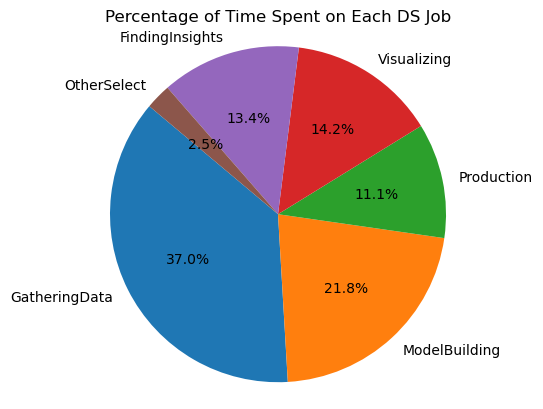

In [120]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

### Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

In [121]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [122]:
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]


<AxesSubplot: >

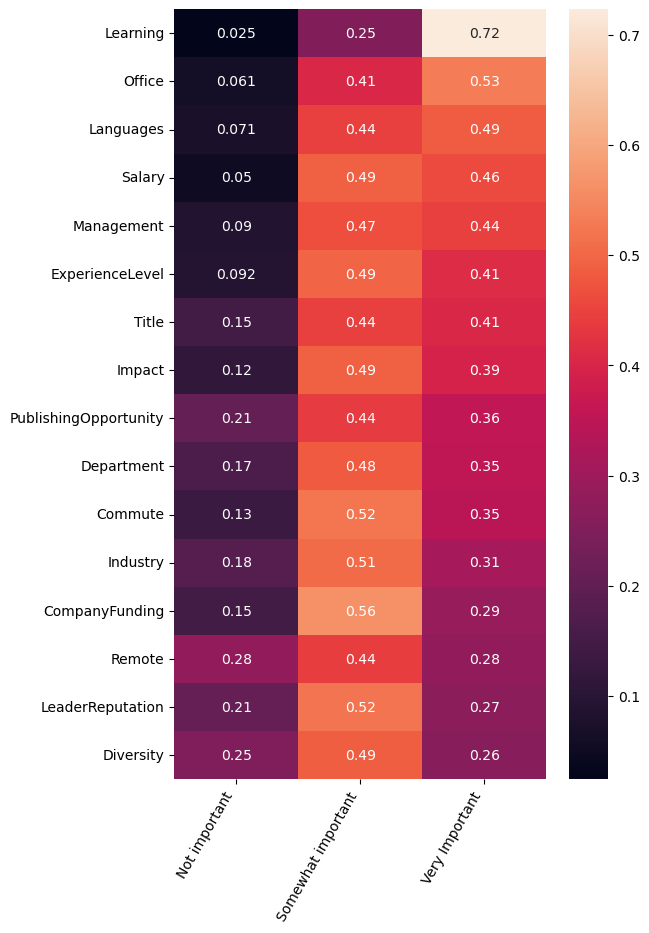

In [123]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

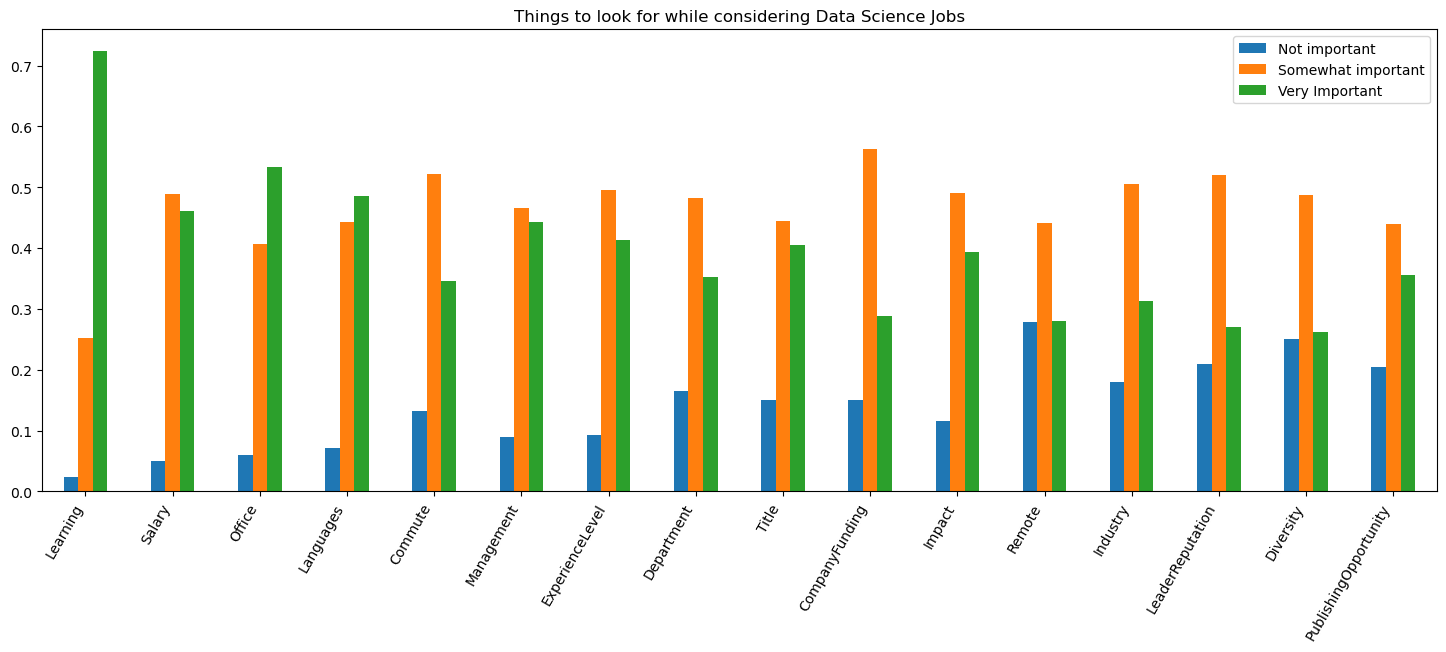

In [124]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()


### Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

<AxesSubplot: xlabel='count', ylabel='UniversityImportance'>

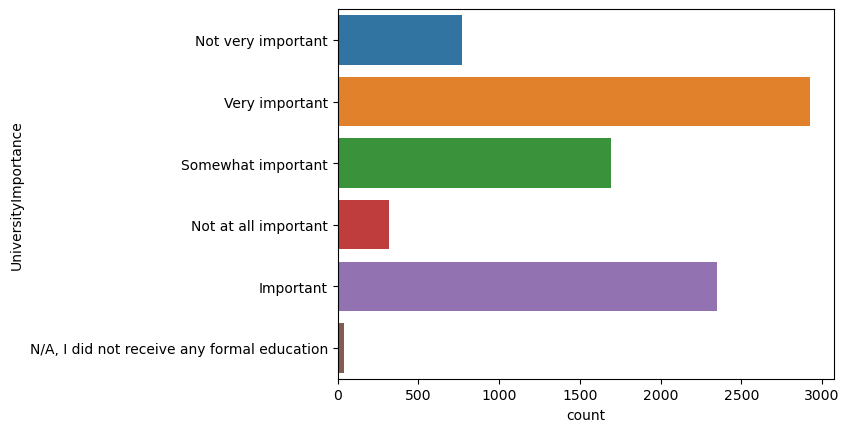

In [125]:
sns.countplot(y='UniversityImportance', data=mcq)

In [127]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')


### Q13. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [128]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

<AxesSubplot: xlabel='count', ylabel='FirstTrainingSelect'>

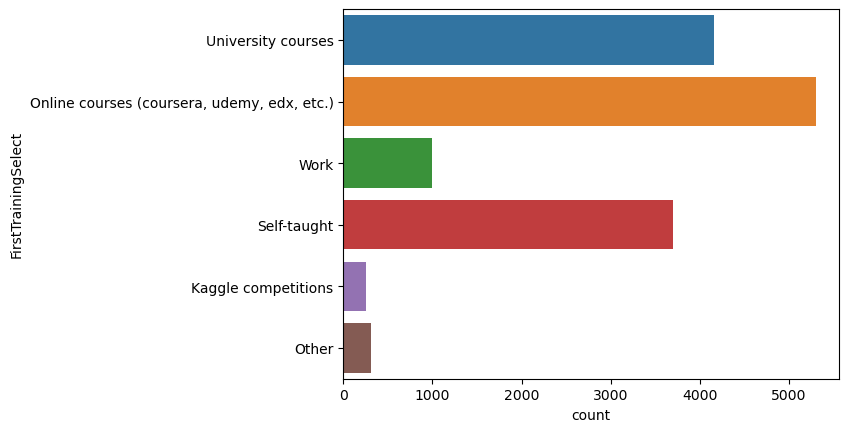

In [133]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

### Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

<AxesSubplot: xlabel='count', ylabel='ProveKnowledgeSelect'>

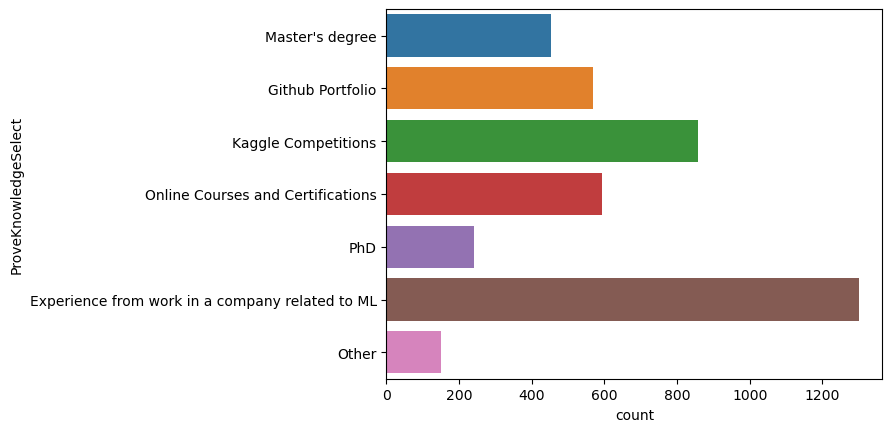

In [134]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

### Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [135]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [136]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

<AxesSubplot: xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

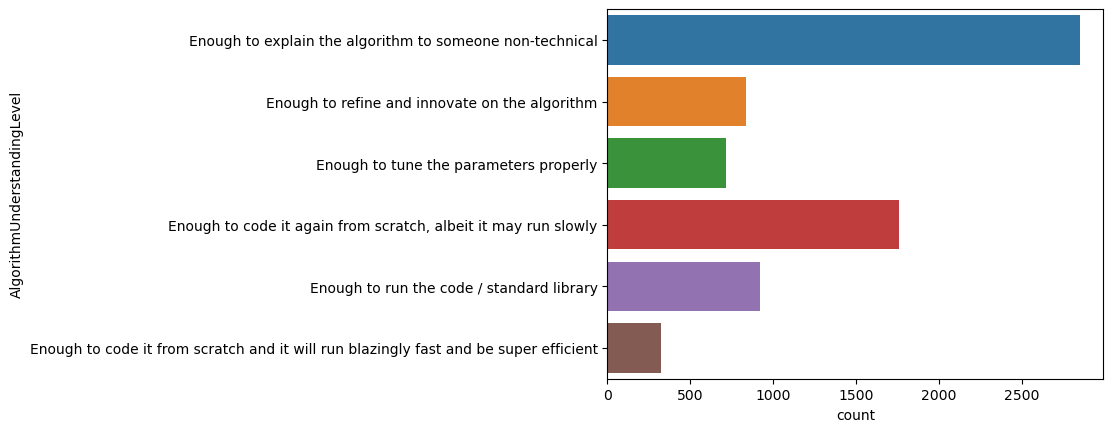

In [137]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

### Q16. 어디에서 일을 찾아야 할까요?

In [138]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


<AxesSubplot: title={'center': 'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

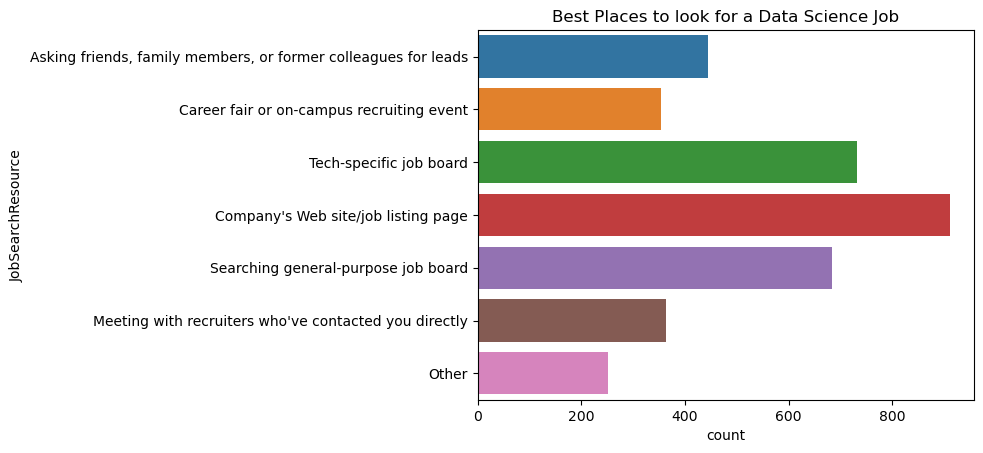

In [139]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

<AxesSubplot: title={'center': 'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

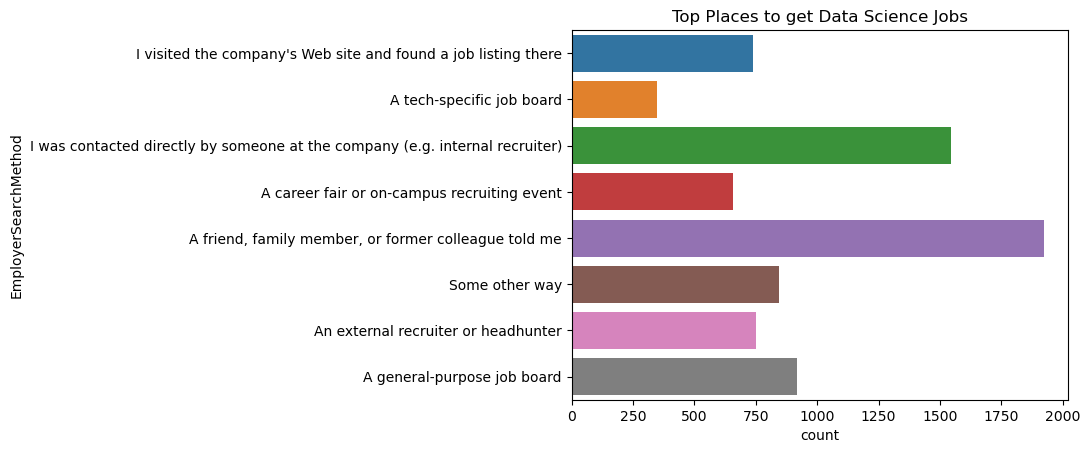

In [140]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

<AxesSubplot: title={'center': 'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

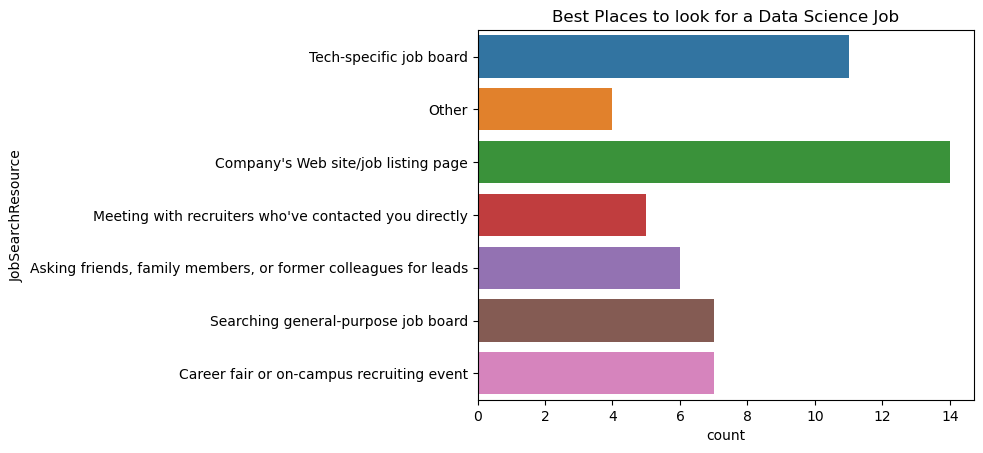

In [141]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

<AxesSubplot: title={'center': 'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

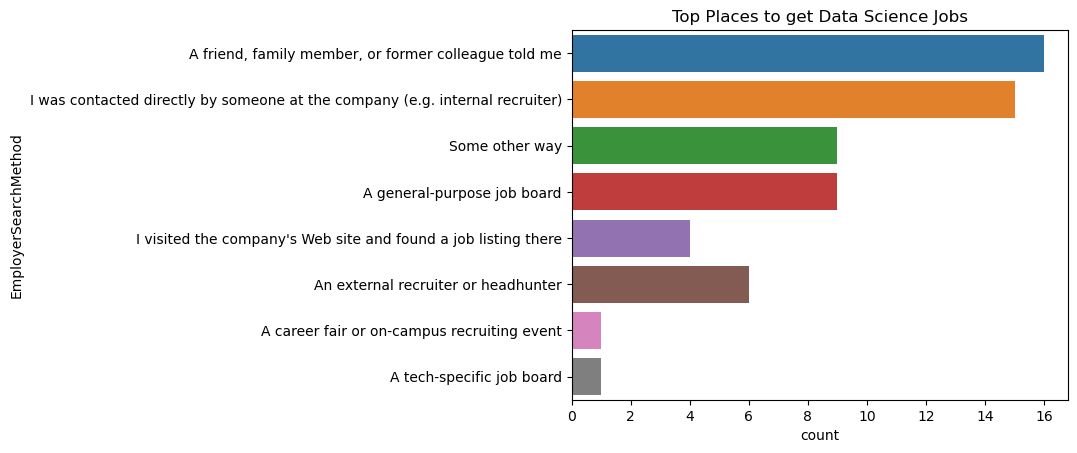

In [142]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)